In [801]:
# Загружаю библеотеки
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV

%matplotlib inline

In [802]:
import warnings
warnings.filterwarnings('ignore')

In [803]:
matplotlib.rcParams.update({'font.size': 14})

In [804]:
def fit_pred(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train) 
    y_test_pred = model.predict(x_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mae(y_train, y_train_pred)
    print(f'r2_train = {r2_train}, mae_train: {mae_train}')
    
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mae(y_test, y_test_pred)
    print(f'r2_test = {r2_test}, mae_test: {mae_test}')
    

In [805]:
def obj_to_bool (columns, df):
    for column in columns:
        unique_true = df[column].unique()[1]
        df[column]  = df[column] == unique_true
# Функция преобразования каитегориальных переменных в булевые, если они принимают только два значения.

In [806]:
def draw_scatter(column_x, column_y, df):
    plt.scatter(df[column_x], df[column_y])
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.show()  
# Функция для отображения scatter-графика по двум признакам.

In [807]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'
TEST_DATASET_EXT_PATH = 'FilimonoMS_predictions.csv'
# Прописываю путь к датасетам

In [808]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [809]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


In [810]:
# Видно пропуски в датасетах

In [811]:
train_df.shape[1]-1 == test_df.shape[1]
# Проверяю количество признаков в тестовом и обучающем датасетах равны


True

In [812]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [813]:
# Признаки LifeSquare и Healthcare_1 имеют пропуски. 
# Ecology_2, Ecology_3, Shops_2 имеют не числовые признаки.


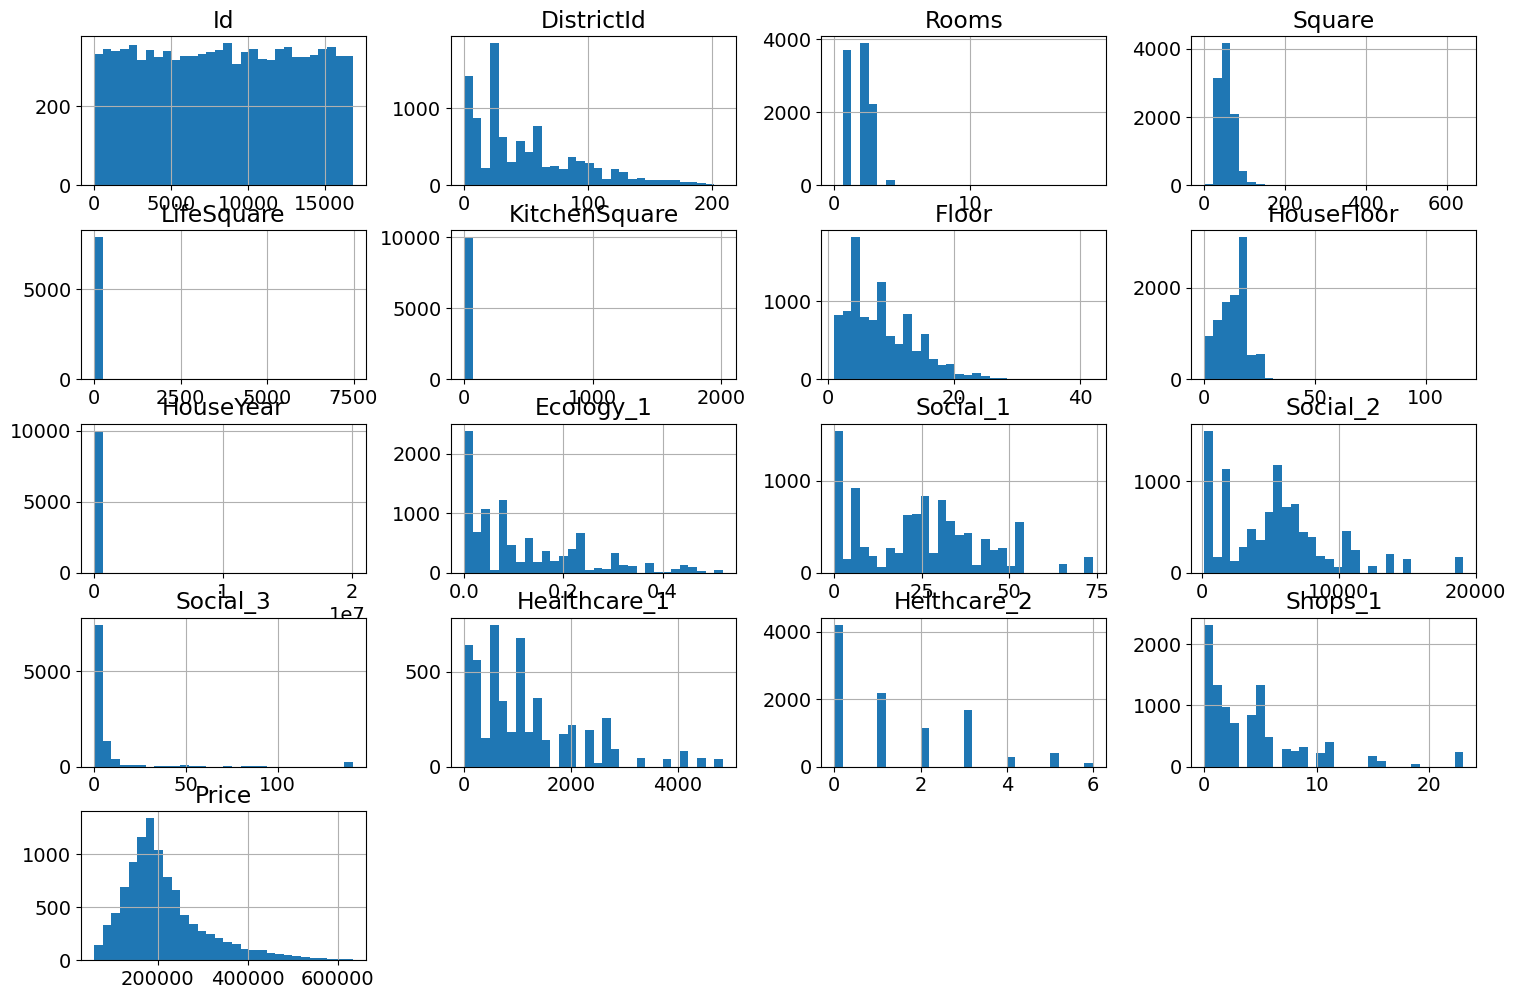

In [815]:
# Просматриваю числовые признаки 
digital_features=train_df.select_dtypes(exclude=['object'])
digital_features.hist(figsize=(18,12), bins=30)
plt.show()

In [816]:
# Видно выбросы в Rooms, Square,LifeSquare, KitchenSquare, HouseYear. 
# Helthcare_2 скорее относится к категориальным признакам.
# Есть длинный хвост стоимости недвижемости после400000.

In [817]:
train_df.describe().round(2)

# Функия describe подверждает присутсвие аномалий.
# HouseYear максимальное значение 20052011, Square минимальное значение 1.14.
# LifeSquare и KitchenSquare, Shops очень большие значения.

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00,10000.00,10000.00,10000.00,7887.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,5202.00,10000.00,10000.00,10000.00
mean,8383.41,50.40,1.89,56.32,37.20,6.27,8.53,12.61,3990.17,0.12,24.69,5352.16,8.04,1142.90,1.32,4.23,214138.86
std,4859.02,43.59,0.84,21.06,86.24,28.56,5.24,6.78,200500.26,0.12,17.53,4006.80,23.83,1021.52,1.49,4.81,92872.29
min,0.00,0.00,0.00,1.14,0.37,0.00,1.00,0.00,1910.00,0.00,0.00,168.00,0.00,0.00,0.00,0.00,59174.78
25%,4169.50,20.00,1.00,41.77,22.77,1.00,4.00,9.00,1974.00,0.02,6.00,1564.00,0.00,350.00,0.00,1.00,153872.63
50%,8394.50,36.00,2.00,52.51,32.78,6.00,7.00,13.00,1977.00,0.08,25.00,5285.00,2.00,900.00,1.00,3.00,192269.64
75%,12592.50,75.00,2.00,65.90,45.13,9.00,12.00,17.00,2001.00,0.20,36.00,7227.00,5.00,1548.00,2.00,6.00,249135.46
max,16798.00,209.00,19.00,641.07,7480.59,2014.00,42.00,117.00,20052011.00,0.52,74.00,19083.00,141.00,4849.00,6.00,23.00,633233.47


In [818]:
train_df[train_df['Rooms'] == 0]

# Просматриваю объекты с 0 количеством комнат. Видно 3 объекта по котрым возникают вопросы.
# Это два объекта с площадью 138 и 212 и объект с 2 метрами.

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [819]:
obj_features = train_df.select_dtypes(include='object').columns
obj_features

# Получаю список из категориальных признаков

Index(['Ecology_2', 'Ecology_3', 'Shops_2'], dtype='object')

In [820]:
train_df['DistrictId'].value_counts().head()

# Просматриваю, какие районы встречаются чаще всего.

27    851
1     652
23    565
6     511
9     294
Name: DistrictId, dtype: int64

In [821]:
obj_to_bool(obj_features, train_df)
# Так как признаки принимают всего два значения, заменяю их на бинарные признаки.

In [822]:
for column in obj_features:
    print('{}\n'.format(train_df[column].value_counts()))
    
# Количество значений не изменилось, значит преобразование сделано правильно.

False    9903
True       97
Name: Ecology_2, dtype: int64

False    9725
True      275
Name: Ecology_3, dtype: int64

False    9175
True      825
Name: Shops_2, dtype: int64



In [823]:
train_df['Rooms'].value_counts()

# Просматриваю  количство комнат сколько раз встречается в датасете. 
# Видно квартиры с 0, 10, 19 анамальные

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [824]:
train_df.loc[train_df['Rooms'].isin([0, 10, 19]), 'Rooms'] = train_df['Rooms'].median()

# Привожу аномальные квартиры к медиальному значению 2

In [825]:
train_df = train_df[train_df['Square'].isnull() |
       (train_df['Square'] < train_df['Square'].quantile(.975)) |
       (train_df['Square'] > train_df['Square'].quantile(.025))]

train_df = train_df[train_df['LifeSquare'].isnull() |
       (train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.975)) |
       (train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.025))]

train_df = train_df[train_df['KitchenSquare'].isnull() |
       (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.975))]

train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

# Убираю выбросы это строки у которых площадь меньше 0.975 квантиль или больше 0.025 или равна 0. 
# И площадь кухни если меньше 3 кв.метров, то меняю значение на 3.

In [826]:
train_df.shape

# Проверяю сколько строк удалилось

(9744, 20)

In [827]:
train_df['HouseYear'].sort_values(ascending=False)

# Смотрю признак год постройки. Сразу видно значение 20052011 и 4968. 
# Так же видно, что самое большое и верное значение это 2020 год.

1497    20052011
4189        4968
7076        2020
2493        2020
4053        2020
          ...   
8505        1918
8144        1917
1380        1917
5053        1917
910         1914
Name: HouseYear, Length: 9744, dtype: int64

In [828]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

# Меняю значение на 2020 год. Если год постройки выше 2020 года. 

In [829]:
train_df['HouseYear'].max()

2020

In [830]:
len(train_df) - train_df.count()

# Смотрю пропуски

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2102
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4673
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [831]:
train_df['LifeSquare'].median()

# считаю медиану жилой площади

32.52527901166731

In [832]:
square_med_diff = (train_df.loc[train_df['LifeSquare'].notnull(), 'Square'] -\
                   train_df.loc[train_df['LifeSquare'].notnull(), 'LifeSquare'] -\
                   train_df.loc[train_df['LifeSquare'].notnull(), 'KitchenSquare']).median()
square_med_diff

# Считаю медиану в соотнощении жилой площади к общей площади и площади кухни

11.295380291262163

In [833]:
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] =\
train_df.loc[train_df['LifeSquare'].isnull(), 'Square'] -\
train_df.loc[train_df['LifeSquare'].isnull(), 'KitchenSquare'] -\
square_med_diff

# Заполняю пропуски 

In [834]:
train_df['LifeSquare'].median()

33.60944665146678

In [835]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].median()
# Заполняю пропуски в Healthcare_1 медиальным значением

In [846]:
train_df.info()
# Проверяю

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9744 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9744 non-null   int64  
 1   DistrictId     9744 non-null   int64  
 2   Rooms          9744 non-null   float64
 3   Square         9744 non-null   float64
 4   LifeSquare     9744 non-null   float64
 5   KitchenSquare  9744 non-null   float64
 6   Floor          9744 non-null   int64  
 7   HouseFloor     9744 non-null   float64
 8   HouseYear      9744 non-null   int64  
 9   Ecology_1      9744 non-null   float64
 10  Ecology_2      9744 non-null   bool   
 11  Ecology_3      9744 non-null   bool   
 12  Social_1       9744 non-null   int64  
 13  Social_2       9744 non-null   int64  
 14  Social_3       9744 non-null   int64  
 15  Healthcare_1   9744 non-null   float64
 16  Helthcare_2    9744 non-null   int64  
 17  Shops_1        9744 non-null   int64  
 18  Shops_2 

In [848]:
obj_to_bool(obj_features, test_df)
# ПРизнаки заменяю на бинарные признаки.

In [849]:
for column in obj_features:
    print('{}\n'.format(test_df[column].value_counts()))
    
# Количество значений не изменилось, значит преобразование сделано правильно.

False    4952
True       48
Name: Ecology_2, dtype: int64

False    4851
True      149
Name: Ecology_3, dtype: int64

False    4588
True      412
Name: Shops_2, dtype: int64



In [850]:
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] =\
test_df.loc[test_df['LifeSquare'].isnull(), 'Square'] -\
test_df.loc[test_df['LifeSquare'].isnull(), 'KitchenSquare'] -\
square_med_diff

# Заполняю пропуски 

In [851]:
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = test_df['Healthcare_1'].median()
# Заполняю пропуски в Healthcare_1 медиальным значением

In [855]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   bool   
 11  Ecology_3      5000 non-null   bool   
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [856]:
features = train_df.columns.drop('Id').drop('DistrictId').drop('Price')
target = 'Price'

In [857]:
X = pd.DataFrame(train_df, columns=features)
y = pd.DataFrame(train_df, columns=[target])

In [858]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [859]:
X_test = test_df[features]
X_test.head()


,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,False,False,11,2748,1,900.0,0,0,False
1,2.0,69.263183,56.967803,1.0,6,1.0,1977,0.075779,False,False,6,1437,3,900.0,0,2,False
2,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,False,False,30,7538,87,4702.0,5,5,False
3,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,False,False,23,4583,3,900.0,3,3,False
4,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,False,False,2,629,1,900.0,0,0,True


In [860]:
scaler = StandardScaler()
# Маштабирую данные

In [861]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=features)

In [862]:
model = RandomForestRegressor(n_estimators=1000, max_depth=9, max_features=7, random_state=42)
fit_pred(X_train_scaled, y_train, X_valid_scaled, y_valid, model)
# Строю модель

r2_train = 0.8188540154567525, mae_train: 24944.886312038627
r2_test = 0.718067254868076, mae_test: 29815.28624888605


In [863]:
price = model.predict(X_test_scaled)
pd.DataFrame({ 'Id': test_df['Id'], 'Price': price }).to_csv(TEST_DATASET_EXT_PATH, index=False)
# Выгружаю фаил